In [45]:
library("factoextra")
options(repr.plot.width=12, repr.plot.height=13)

In [46]:
path="C:/Users/Jordi/New_Jupyter/"
setwd(path)
mydata = read.csv("threads_ideal_data_partial_sp_cl+listR.csv", sep=";")
unique(mydata[,"comp_opt"])

[1] O2
Levels: O2

In [47]:
colnames(mydata)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "time_x"       "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN" 
[16] "PAPI_BR_MSP"  "time_y"       "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM" 
[21] "time_x.1"     "PAPI_SP_OPS"  "PAPI_LD_INS"  "PAPI_L2_STM"  "time_y.1"    
[26] "PAPI_TLB_DM"  "PAPI_L2_DCH"  "time"         "time_log"     "P_index"     
[31] "ideal"        "affinity"     "T_list"       "P_list"

In [48]:
library(stringr)
colnames(mydata)<-gsub(x = names(mydata), pattern = "\\.", replacement = "_" )

In [49]:
#colnames(mydata)

In [50]:
mydata = mydata[mydata$affinity == 'close',]
mydata = mydata[mydata$threads == 6,]
unique(mydata$threads)
mydata_no_time <- subset(mydata, select = -c(P_list))
mydata_no_time <- subset(mydata_no_time, select = -c(T_list))
mydata_no_time <- subset(mydata_no_time, select = -c(ideal))
mydata_no_time <- subset(mydata_no_time, select = -c(P_index))
mydata_no_time <- subset(mydata_no_time, select = -c(time_log))
mydata_no_time <- subset(mydata_no_time, select = -c(time))
mydata_no_time <- subset(mydata_no_time, select = -c(time_y_1))
mydata_no_time <- subset(mydata_no_time, select = -c(time_x_1))
mydata_no_time <- subset(mydata_no_time, select = -c(time_x))
mydata_no_time <- subset(mydata_no_time, select = -c(time_y))
mydata_no_time <- subset(mydata_no_time, select = -c(affinity))




mydata_no_time <- subset(mydata_no_time, select = -c(PAPI_SP_OPS))



[1] 12

In [51]:
colnames(mydata_no_time)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [52]:
#mydata = mydata[mydata$comp_opt != 'NF',]
#mydata = mydata[mydata$comp_opt != 'O1',]
#mydata = mydata[mydata$label != '2D4PStencil_E',]
#mydata = mydata[mydata$label != 'Reduction_E',]
#mydata = mydata[mydata$label != '2PStencil_E',]

#head(mydata)
#unique(mydata[,"comp_opt"])

In [53]:
#head(mydata)

In [54]:
dfu <- unique(mydata_no_time$size_vector)
#dfu[order(dfu)]

comprss <- function(tx) { 
      div <- findInterval(as.numeric(gsub("\\,", "", tx)), 
                          c(1, 1e3, 1e6, 1e9, 1e12) )
      paste(round( as.numeric(gsub("\\,","",tx))/10^(3*(div-1)), 2), 
           c("","K","M","B","T")[div] )}
comprss(dfu[order(dfu)])



[1] "1 K"   "2 K"   "3 K"   "4 K"   "5 K"   "6 K"   "7 K"   "8 K"   "9 K"  
[10] "10 K"  "20 K"  "30 K"  "40 K"  "50 K"  "60 K"  "70 K"  "80 K"  "90 K" 
[19] "100 K" "200 K" "300 K" "400 K" "500 K" "600 K" "700 K" "800 K" "900 K"
[28] "1 M"   "2 M"   "3 M"   "5 M"   "7 M"   "9 M"   "20 M"  "40 M"  "60 M" 
[37] "80 M"  "100 M" "120 M" "140 M" "160 M" "180 M" "200 M"

In [55]:
#print(new_mydata[,c("PAPI_VEC_SP","PAPI_VEC_DP")])
#print(mydata[,c("PAPI_VEC_SP","PAPI_SP_OPS")])

In [56]:
#div = mydata$PAPI_SP_OPS/mydata$PAPI_VEC_SP
#div <- na.omit(div)
#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN + mydata$PAPI_BR_UCN)

In [57]:
#mean(div)
#quantile(div,0.25)
#quantile(div,0.5)
#quantile(div,0.75)
#boxplot(div)

In [58]:
#print(mydata[,c("PAPI_BR_INS","PAPI_BR_CN","PAPI_BR_UCN")])#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN/mydata$PAPI_BR_UCN)
#print(subs)
#perc = subs/mydata$PAPI_BR_INS

#head(percent(perc[order(perc,decreasing = TRUE)]))

In [59]:
#all(new_mydata$PAPI_VEC_SP == new_mydata$PAPI_VEC_DP)
all(mydata_no_time$PAPI_DP_SP == mydata_no_time$PAPI_SP_OPS)

[1] TRUE

In [60]:
colnames(mydata_no_time)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [61]:
colnames(mydata_no_time[6:ncol(mydata_no_time)])

[1] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
 [6] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[11] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[16] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [62]:
new_mydata = mydata_no_time[,6:ncol(mydata_no_time)]
dim(new_mydata)


[1] 64500    17

In [63]:
new_mydata

,PAPI_L1_DCM,PAPI_L3_TCM,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L2_LDM,PAPI_SR_INS,PAPI_BR_UCN,PAPI_BR_CN,PAPI_BR_TKN,PAPI_BR_MSP,PAPI_FP_OPS,PAPI_L1_LDM,PAPI_L1_STM,PAPI_LD_INS,PAPI_L2_STM,PAPI_TLB_DM,PAPI_L2_DCH
790501,6979,908,1785339,3621114,2412,37762,8370,493325,281156,1890,87,5099,1252,338241,729,326,3399
790502,4731,172,3494398,6618708,982,36439,8092,883153,491630,1533,45,3305,883,534823,394,49,2964
790503,4430,170,3532713,6666930,671,36429,8122,906755,503242,1497,47,3543,845,501111,210,27,2708
790504,4191,152,3592922,6799068,845,36429,8082,865553,482227,1474,45,2851,662,500036,194,47,2983
790505,3665,117,3427617,6498450,570,36440,8099,862250,480821,1446,45,3036,746,517422,187,30,2796
790506,3975,106,3419219,6470226,592,36429,8109,866898,483466,1506,45,2906,623,498582,169,33,2915
790507,3958,118,3494062,6607890,607,36429,8099,878947,488915,1444,45,2922,720,499717,194,40,2741
790508,4002,116,3482682,6586722,606,36440,8076,861209,480835,1444,45,2929,720,494978,168,36,2925
790509,3704,111,3410205,6449562,606,36429,8091,921034,510109,1530,45,2847,607,495566,179,31,2694
790510,3928,108,3453541,6525576,608,36429,8088,881369,490065,1425,45,3124,745,539375,208,28,3005


In [64]:
colnames(mydata_no_time)
log.ir <-scale(new_mydata, center = TRUE, scale = TRUE)
res.label <- mydata_no_time[,4]
res.pca <- prcomp(log.ir, center = TRUE, scale. = TRUE)



[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [65]:
print(res.pca)

Standard deviations (1, .., p=17):
 [1] 3.426345192 1.511605575 0.956623647 0.720068516 0.684915413 0.660377805
 [7] 0.541916292 0.409097352 0.262371685 0.232461984 0.209313122 0.084793600
[13] 0.028704365 0.020236555 0.011297279 0.007236352 0.006708357

Rotation (n x k) = (17 x 17):
                   PC1         PC2         PC3         PC4           PC5
PAPI_L1_DCM  0.2710465  0.16533313 -0.21661318  0.09781396 -0.0004415752
PAPI_L3_TCM  0.2574348  0.20366114 -0.01187973 -0.04455210 -0.0606829606
PAPI_TOT_INS 0.2567864 -0.29674000 -0.02596524 -0.02243327 -0.0646816334
PAPI_REF_CYC 0.2682557  0.17475895 -0.07986439 -0.09796706  0.1084958244
PAPI_L2_LDM  0.2460985  0.22532513 -0.07407116  0.35954256 -0.4106721222
PAPI_SR_INS  0.2675510 -0.19461606  0.06937210 -0.09095679 -0.0705439947
PAPI_BR_UCN  0.2180916 -0.09123508  0.12601003 -0.46294510  0.0346246880
PAPI_BR_CN   0.2676836 -0.19562810  0.11865117 -0.14473431 -0.0990624260
PAPI_BR_TKN  0.2675730 -0.19569348  0.11816293 -0.14192718

In [66]:
names(res.pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [67]:
print(res.pca$sdev)

 [1] 3.426345192 1.511605575 0.956623647 0.720068516 0.684915413 0.660377805
 [7] 0.541916292 0.409097352 0.262371685 0.232461984 0.209313122 0.084793600
[13] 0.028704365 0.020236555 0.011297279 0.007236352 0.006708357


In [68]:
head(unclass(res.pca$rotation)[])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
PAPI_L1_DCM,0.2710465,0.1653331,-0.21661318,0.09781396,-0.0004415752,0.08266822,0.12673235,-0.01328220,0.010562391,-0.28838681,0.5214586135,0.646296981,0.08538704,-0.10235628,0.16936295,-0.0023818279,-0.016838085
PAPI_L3_TCM,0.2574348,0.2036611,-0.01187973,-0.04455210,-0.0606829606,-0.20965954,-0.51839996,-0.37287047,0.188220138,0.05020024,0.0006148102,-0.207574294,0.09510898,-0.21649669,0.54455319,-0.0342494785,-0.007135775
PAPI_TOT_INS,0.2567864,-0.2967400,-0.02596524,-0.02243327,-0.0646816334,-0.13214539,-0.01132676,0.10134759,-0.387286478,-0.03197855,-0.1913871532,0.019356441,0.74548232,-0.24066766,-0.09194567,0.0190224368,0.047802820
PAPI_REF_CYC,0.2682557,0.1747590,-0.07986439,-0.09796706,0.1084958244,-0.19554352,-0.35714279,-0.27718156,0.161762277,-0.02074165,0.0482764842,0.090456729,0.05195774,0.22617511,-0.73018915,0.0505388746,0.020920738
PAPI_L2_LDM,0.2460985,0.2253251,-0.07407116,0.35954256,-0.4106721222,0.20371906,0.02591196,0.07673785,0.009383698,0.11785666,-0.1994508517,-0.008903558,-0.04858802,0.08734030,-0.04552135,-0.2672731448,0.632344145
PAPI_SR_INS,0.2675510,-0.1946161,0.06937210,-0.09095679,-0.0705439947,-0.07925532,0.22182946,-0.24844708,0.086600586,-0.64856184,-0.5054036274,0.075212940,-0.24237694,0.04723017,0.06284816,0.0003794741,-0.033377804


In [69]:
# Eigenvalues
eig <- (res.pca$sdev)^2
print(eig)

 [1] 1.173984e+01 2.284951e+00 9.151288e-01 5.184987e-01 4.691091e-01
 [6] 4.360988e-01 2.936733e-01 1.673606e-01 6.883890e-02 5.403857e-02
[11] 4.381198e-02 7.189955e-03 8.239405e-04 4.095181e-04 1.276285e-04
[16] 5.236480e-05 4.500205e-05


In [70]:
# Variances in percentage
variance <- eig*100/sum(eig)
print(variance)

 [1] 6.905789e+01 1.344089e+01 5.383111e+00 3.049992e+00 2.759465e+00
 [6] 2.565287e+00 1.727490e+00 9.844744e-01 4.049347e-01 3.178740e-01
[11] 2.577175e-01 4.229385e-02 4.846709e-03 2.408930e-03 7.507559e-04
[16] 3.080282e-04 2.647179e-04


In [71]:
# Cumulative variances
cumvar <- cumsum(variance)
print(cumvar)

 [1]  69.05789  82.49878  87.88189  90.93188  93.69135  96.25664  97.98413
 [8]  98.96860  99.37354  99.69141  99.94913  99.99142  99.99627  99.99868
[15]  99.99943  99.99974 100.00000


In [72]:
eig.decathlon2.active <- data.frame(eig = eig, variance = variance,cumvariance = cumvar)
print(eig.decathlon2.active)

            eig     variance cumvariance
1  1.173984e+01 6.905789e+01    69.05789
2  2.284951e+00 1.344089e+01    82.49878
3  9.151288e-01 5.383111e+00    87.88189
4  5.184987e-01 3.049992e+00    90.93188
5  4.691091e-01 2.759465e+00    93.69135
6  4.360988e-01 2.565287e+00    96.25664
7  2.936733e-01 1.727490e+00    97.98413
8  1.673606e-01 9.844744e-01    98.96860
9  6.883890e-02 4.049347e-01    99.37354
10 5.403857e-02 3.178740e-01    99.69141
11 4.381198e-02 2.577175e-01    99.94913
12 7.189955e-03 4.229385e-02    99.99142
13 8.239405e-04 4.846709e-03    99.99627
14 4.095181e-04 2.408930e-03    99.99868
15 1.276285e-04 7.507559e-04    99.99943
16 5.236480e-05 3.080282e-04    99.99974
17 4.500205e-05 2.647179e-04   100.00000


In [73]:
summary(res.pca)

Importance of components:
                          PC1    PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     3.4263 1.5116 0.95662 0.7201 0.68492 0.66038 0.54192
Proportion of Variance 0.6906 0.1344 0.05383 0.0305 0.02759 0.02565 0.01727
Cumulative Proportion  0.6906 0.8250 0.87882 0.9093 0.93691 0.96257 0.97984
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.40910 0.26237 0.23246 0.20931 0.08479 0.02870 0.02024
Proportion of Variance 0.00984 0.00405 0.00318 0.00258 0.00042 0.00005 0.00002
Cumulative Proportion  0.98969 0.99374 0.99691 0.99949 0.99991 0.99996 0.99999
                          PC15     PC16     PC17
Standard deviation     0.01130 0.007236 0.006708
Proportion of Variance 0.00001 0.000000 0.000000
Cumulative Proportion  0.99999 1.000000 1.000000

In [74]:
library("factoextra")
eig.val <- get_eigenvalue(res.pca)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,11.7398414,69.057890,69.05789
Dim.2,2.2849514,13.440891,82.49878
Dim.3,0.9151288,5.383111,87.88189
Dim.4,0.5184987,3.049992,90.93188
Dim.5,0.4691091,2.759465,93.69135
Dim.6,0.4360988,2.565287,96.25664


In [75]:
options(repr.plot.width = 20, repr.plot.height = 10)

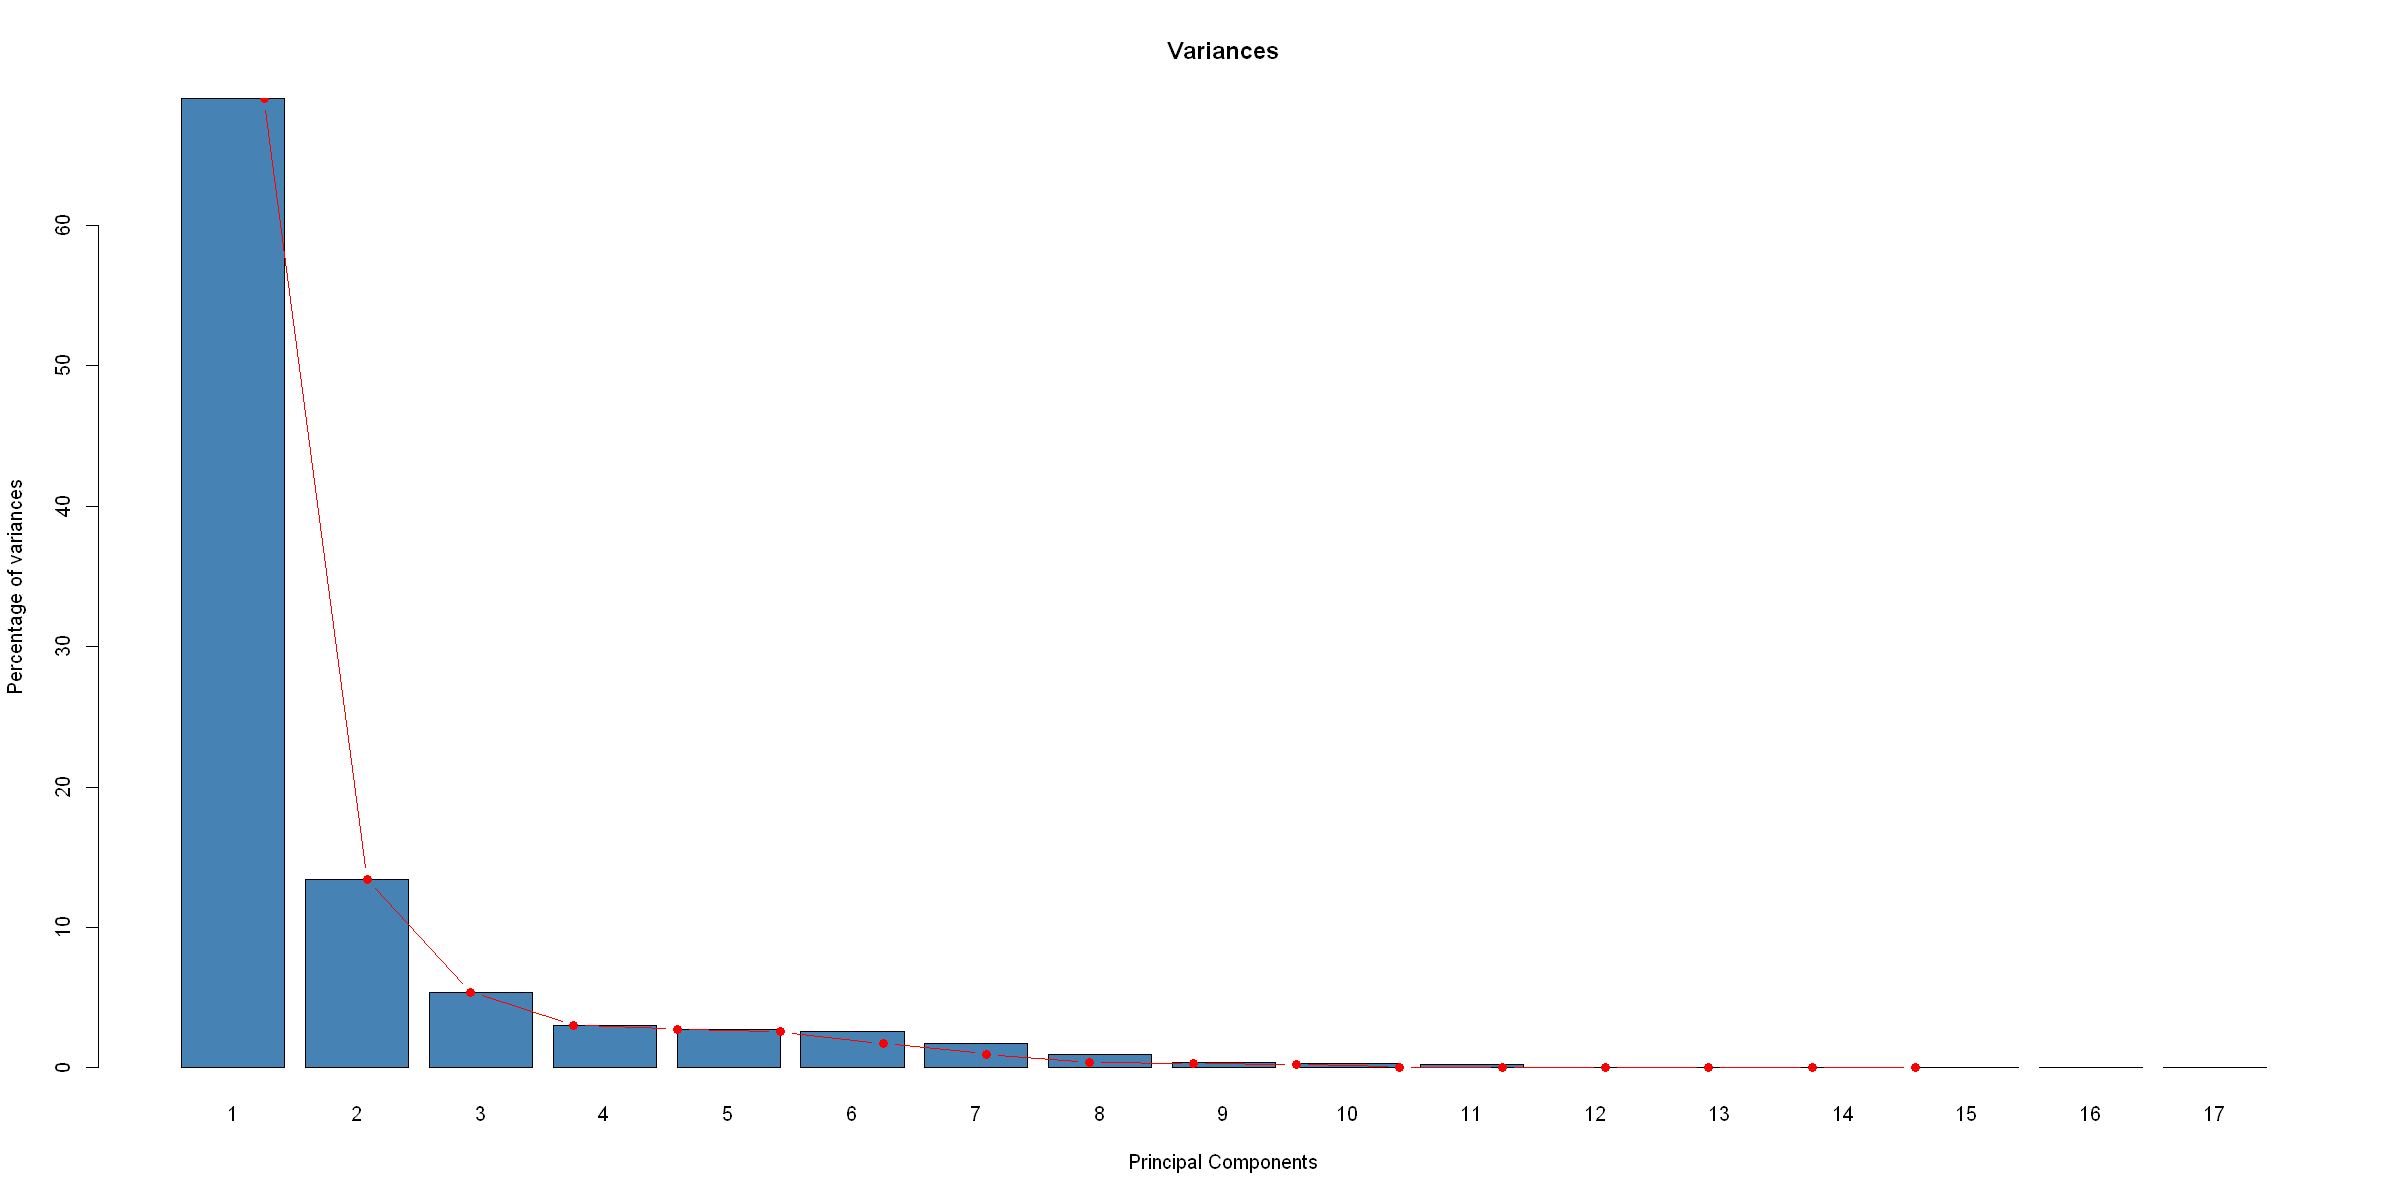

In [76]:
barplot(eig.decathlon2.active[, 2], names.arg=1:nrow(eig.decathlon2.active), 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "Percentage of variances",
       col ="steelblue")
# Add connected line segments to the plot
lines(x = 1:nrow(eig.decathlon2.active), 
      eig.decathlon2.active[, 2], 
      type="b", pch=19, col = "red")

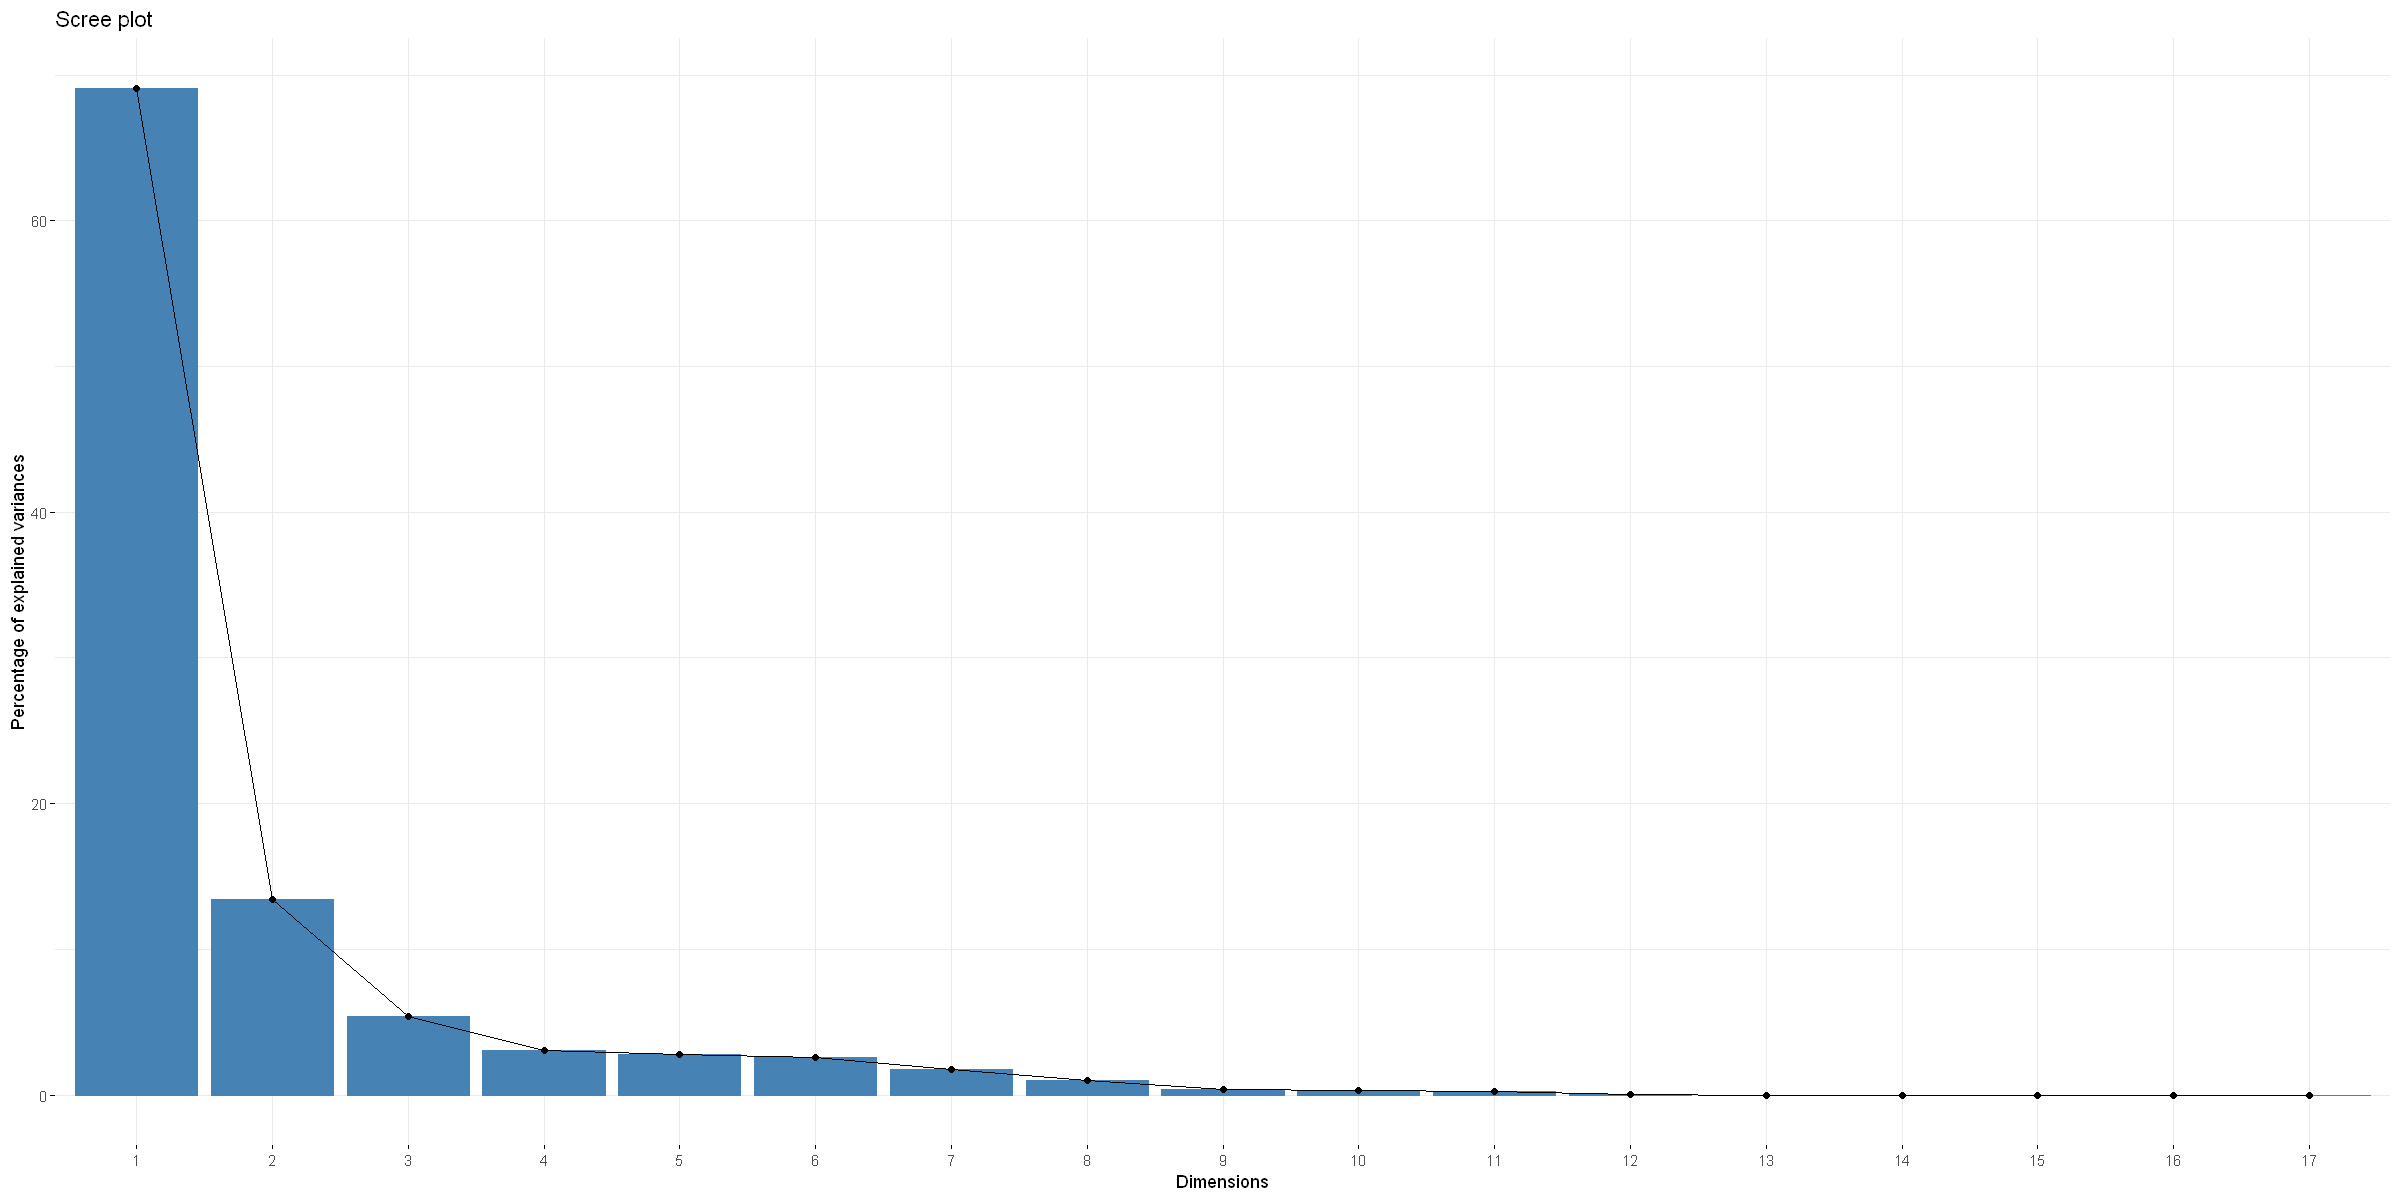

In [77]:
fviz_screeplot(res.pca, ncp=54)

In [78]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [79]:
var$coord


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14,Dim.15,Dim.16,Dim.17
PAPI_L1_DCM,0.9286990,0.2499185,-0.20721729,0.07043275,-0.0003024417,0.0545922601,0.068678326,-0.005433713,0.002771272,-0.067038970,0.1091481304,0.0548018480,2.450981e-03,-2.071338e-03,0.0019133405,-1.723575e-05,-1.129559e-04
PAPI_L3_TCM,0.8820604,0.3078553,-0.01136443,-0.03208057,-0.0415626950,-0.1384545086,-0.280929382,-0.152540321,0.049383635,0.011669646,0.0001286878,-0.0176009718,2.730043e-03,-4.381147e-03,0.0061519692,-2.478413e-04,-4.786932e-05
PAPI_TOT_INS,0.8798387,-0.4485538,-0.02483897,-0.01615349,-0.0443014476,-0.0872658853,-0.006138153,0.041461032,-0.101613006,-0.007433797,-0.0400598425,0.0016413024,2.139860e-02,-4.870284e-03,-0.0010387359,1.376531e-04,3.206784e-04
PAPI_REF_CYC,0.9191365,0.2641666,-0.07640017,-0.07054300,0.0743104623,-0.1291326028,-0.193541499,-0.113394240,0.042441841,-0.004821646,0.0101049016,0.0076701517,1.491414e-03,4.577005e-03,-0.0082491504,3.657171e-04,1.403438e-04
PAPI_L2_LDM,0.8432185,0.3406027,-0.07085822,0.25889528,-0.2812756660,0.1345315424,0.014042115,0.031393252,0.002462017,0.027397193,-0.0417476805,-0.0007549648,-1.394688e-03,1.767467e-03,-0.0005142673,-1.934083e-03,4.241990e-03
PAPI_SR_INS,0.9167220,-0.2941827,0.06636300,-0.06549512,-0.0483166692,-0.0523384516,0.120212998,-0.101639041,0.022721542,-0.150765973,-0.1057876111,0.0063775760,-6.957276e-03,9.557760e-04,0.0007100132,2.746008e-06,-2.239102e-04
PAPI_BR_UCN,0.7472572,-0.1379115,0.12054418,-0.33335219,0.0237149825,0.5206483703,-0.154149747,0.038167758,-0.003203297,-0.008022422,-0.0010752593,-0.0008245332,-1.279161e-04,-1.527701e-05,0.0000101577,3.605712e-05,8.243852e-06
PAPI_BR_CN,0.9171765,-0.2957125,0.11350451,-0.10421862,-0.0678493824,-0.0340344377,0.136961627,-0.117924028,-0.033437603,0.085804798,0.0252677095,0.0034805561,-3.471122e-03,8.489285e-04,-0.0003600756,-4.739189e-03,-1.904019e-03
PAPI_BR_TKN,0.9167973,-0.2958114,0.11303745,-0.10219730,-0.0675968030,-0.0378502372,0.139585964,-0.118097476,-0.033454678,0.086490641,0.0257040112,0.0034343339,-4.903720e-03,1.194378e-03,0.0008406137,4.648706e-03,1.787367e-03
PAPI_BR_MSP,0.9334374,0.2449053,0.17065848,0.08289807,0.0357716154,0.0002399223,0.078917323,0.024285085,-0.075287338,-0.084209886,0.0948502442,-0.0535040333,-1.557268e-03,5.432153e-04,-0.0008926364,7.506822e-06,3.358615e-05


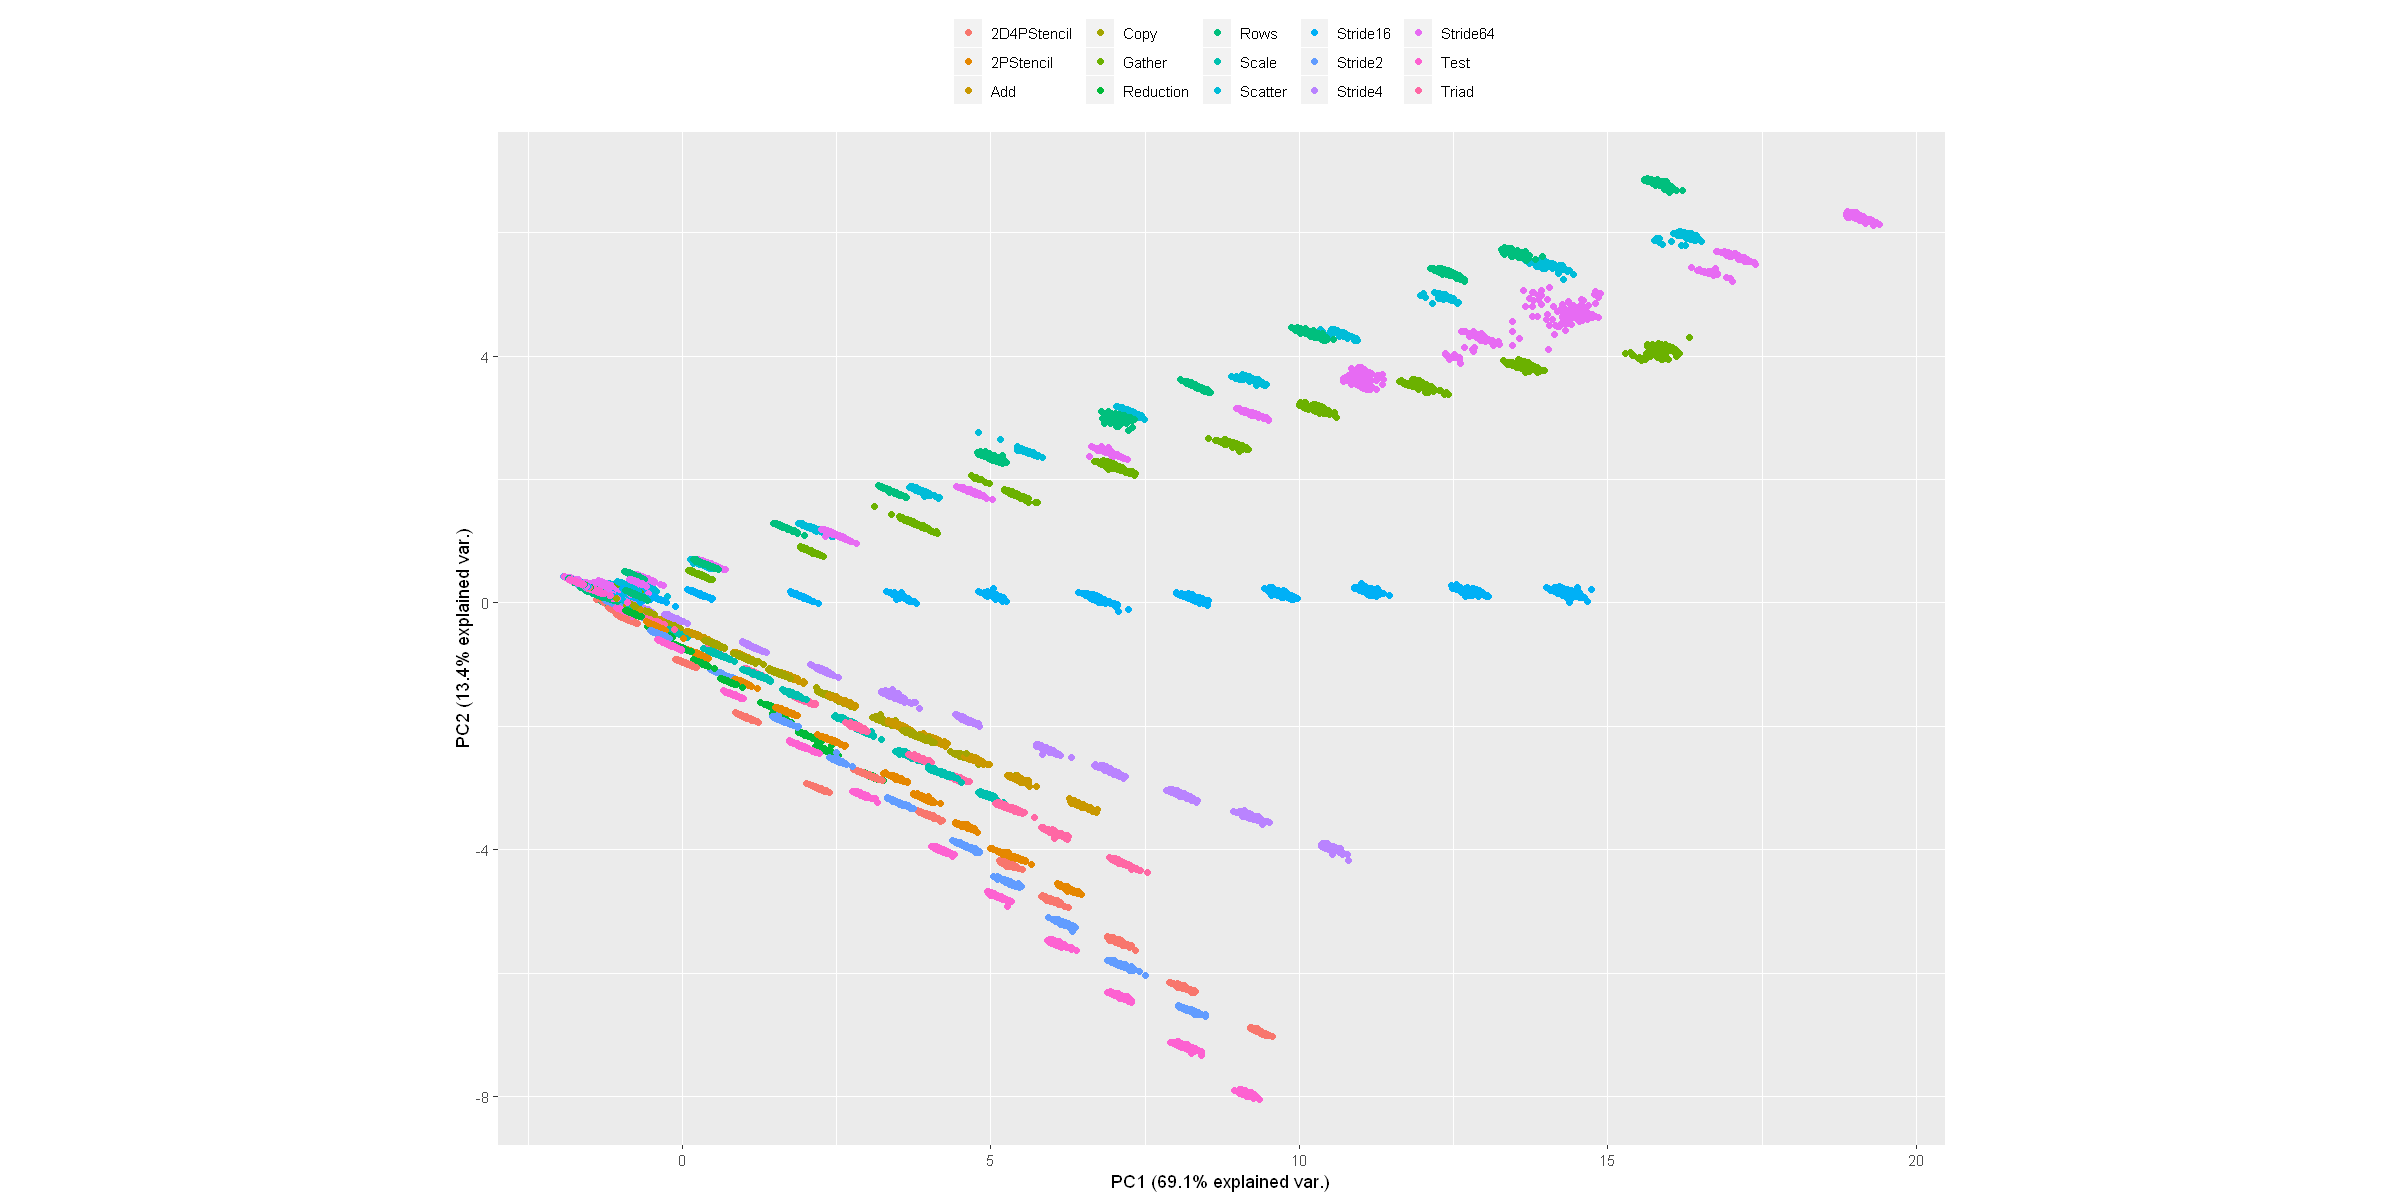

In [80]:
library(devtools)
library(ggbiplot)
g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = res.label, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
#g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = {res.label, res.threads}, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', legend.position = 'top')
print(g)

In [81]:
# Helper function : 
# Correlation between variables and principal components
var_cor_func <- function(var.loadings, comp.sdev){
  var.loadings*comp.sdev
  }

# Variable correlation/coordinates
loadings <- res.pca$rotation
sdev <- res.pca$sdev

var.coord <- var.cor <- t(apply(loadings, 1, var_cor_func, sdev))
print(var.coord[, 1:4])

                   PC1        PC2         PC3         PC4
PAPI_L1_DCM  0.9286990  0.2499185 -0.20721729  0.07043275
PAPI_L3_TCM  0.8820604  0.3078553 -0.01136443 -0.03208057
PAPI_TOT_INS 0.8798387 -0.4485538 -0.02483897 -0.01615349
PAPI_REF_CYC 0.9191365  0.2641666 -0.07640017 -0.07054300
PAPI_L2_LDM  0.8432185  0.3406027 -0.07085822  0.25889528
PAPI_SR_INS  0.9167220 -0.2941827  0.06636300 -0.06549512
PAPI_BR_UCN  0.7472572 -0.1379115  0.12054418 -0.33335219
PAPI_BR_CN   0.9171765 -0.2957125  0.11350451 -0.10421862
PAPI_BR_TKN  0.9167973 -0.2958114  0.11303745 -0.10219730
PAPI_BR_MSP  0.9334374  0.2449053  0.17065848  0.08289807
PAPI_FP_OPS  0.6624532 -0.5966435 -0.31520936  0.09013650
PAPI_L1_LDM  0.8775764  0.2640518 -0.07592985  0.28452950
PAPI_L1_STM  0.8358556  0.3804532 -0.25974218 -0.15164596
PAPI_LD_INS  0.7905560 -0.4214059  0.26155961 -0.08444988
PAPI_L2_STM  0.8105766  0.4156322 -0.27045922 -0.17991568
PAPI_TLB_DM  0.5260323  0.4144805  0.68672350  0.11187320
PAPI_L2_DCH  0

In [82]:
var.cos2 <- var.coord^2
print(var.cos2)

                   PC1        PC2          PC3          PC4          PC5
PAPI_L1_DCM  0.8624819 0.06245924 0.0429390069 0.0049607730 9.147097e-08
PAPI_L3_TCM  0.7780305 0.09477490 0.0001291503 0.0010291628 1.727458e-03
PAPI_TOT_INS 0.7741161 0.20120054 0.0006169743 0.0002609353 1.962618e-03
PAPI_REF_CYC 0.8448120 0.06978400 0.0058369857 0.0049763146 5.522045e-03
PAPI_L2_LDM  0.7110175 0.11601022 0.0050208876 0.0670267656 7.911600e-02
PAPI_SR_INS  0.8403792 0.08654347 0.0044040472 0.0042896105 2.334501e-03
PAPI_BR_UCN  0.5583933 0.01901957 0.0145308988 0.1111236846 5.624004e-04
PAPI_BR_CN   0.8412128 0.08744590 0.0128832742 0.0108615215 4.603539e-03
PAPI_BR_TKN  0.8405173 0.08750436 0.0127774655 0.0104442871 4.569328e-03
PAPI_BR_MSP  0.8713053 0.05997862 0.0291243174 0.0068720904 1.279608e-03
PAPI_FP_OPS  0.4388443 0.35598350 0.0993569413 0.0081245878 4.155124e-04
PAPI_L1_LDM  0.7701403 0.06972334 0.0057653419 0.0809570360 4.865036e-02
PAPI_L1_STM  0.6986545 0.14474465 0.0674660002 0.02

In [83]:
comp.cos2 <- apply(var.cos2, 2, sum)

contrib <- function(var.cos2, comp.cos2){var.cos2*100/comp.cos2}

var.contrib <- t(apply(var.cos2,1, contrib, comp.cos2))
print(var.contrib)

                  PC1       PC2         PC3         PC4          PC5
PAPI_L1_DCM  7.346623  2.733504  4.69212714  0.95675713 1.949887e-05
PAPI_L3_TCM  6.627266  4.147786  0.01411280  0.19848899 3.682422e-01
PAPI_TOT_INS 6.593923  8.805463  0.06741939  0.05032516 4.183714e-01
PAPI_REF_CYC 7.196111  3.054069  0.63783215  0.95975455 1.177134e+00
PAPI_L2_LDM  6.056449  5.077142  0.54865365 12.92708541 1.686516e+01
PAPI_SR_INS  7.158352  3.787541  0.48124889  0.82731369 4.976455e-01
PAPI_BR_UCN  4.756396  0.832384  1.58785285 21.43181679 1.198869e-01
PAPI_BR_CN   7.165453  3.827036  1.40780993  2.09480219 9.813364e-01
PAPI_BR_TKN  7.159529  3.829594  1.39624778  2.01433249 9.740437e-01
PAPI_BR_MSP  7.421781  2.624941  3.18253751  1.32538246 2.727742e-01
PAPI_FP_OPS  3.738077 15.579478 10.85715379  1.56694479 8.857479e-02
PAPI_L1_LDM  6.560057  3.051415  0.63000333 15.61374040 1.037080e+01
PAPI_L1_STM  5.951141  6.334693  7.37229559  4.43520836 8.578903e+00
PAPI_LD_INS  5.323570  7.771846  7

In [84]:
print(sort(var.contrib[,'PC1'],decreasing=TRUE))

 PAPI_BR_MSP  PAPI_L1_DCM PAPI_REF_CYC   PAPI_BR_CN  PAPI_BR_TKN  PAPI_SR_INS 
    7.421781     7.346623     7.196111     7.165453     7.159529     7.158352 
 PAPI_L3_TCM PAPI_TOT_INS  PAPI_L1_LDM  PAPI_L2_LDM  PAPI_L1_STM  PAPI_L2_STM 
    6.627266     6.593923     6.560057     6.056449     5.951141     5.596620 
 PAPI_LD_INS  PAPI_BR_UCN  PAPI_FP_OPS  PAPI_L2_DCH  PAPI_TLB_DM 
    5.323570     4.756396     3.738077     2.991635     2.357017 


In [85]:
print(sort(var.contrib[,'PC2'],decreasing=TRUE))

 PAPI_FP_OPS  PAPI_L2_DCH PAPI_TOT_INS  PAPI_LD_INS  PAPI_L2_STM  PAPI_TLB_DM 
   15.579478    13.464269     8.805463     7.771846     7.560341     7.518500 
 PAPI_L1_STM  PAPI_L2_LDM  PAPI_L3_TCM  PAPI_BR_TKN   PAPI_BR_CN  PAPI_SR_INS 
    6.334693     5.077142     4.147786     3.829594     3.827036     3.787541 
PAPI_REF_CYC  PAPI_L1_LDM  PAPI_L1_DCM  PAPI_BR_MSP  PAPI_BR_UCN 
    3.054069     3.051415     2.733504     2.624941     0.832384 


In [86]:
print(sort(var.contrib[,'PC3'],decreasing=TRUE))

 PAPI_TLB_DM  PAPI_FP_OPS  PAPI_L2_STM  PAPI_LD_INS  PAPI_L1_STM  PAPI_L1_DCM 
 51.53254600  10.85715379   7.99321264   7.47582498   7.37229559   4.69212714 
 PAPI_BR_MSP  PAPI_BR_UCN   PAPI_BR_CN  PAPI_BR_TKN PAPI_REF_CYC  PAPI_L1_LDM 
  3.18253751   1.58785285   1.40780993   1.39624778   0.63783215   0.63000333 
 PAPI_L2_LDM  PAPI_SR_INS  PAPI_L2_DCH PAPI_TOT_INS  PAPI_L3_TCM 
  0.54865365   0.48124889   0.12312156   0.06741939   0.01411280 


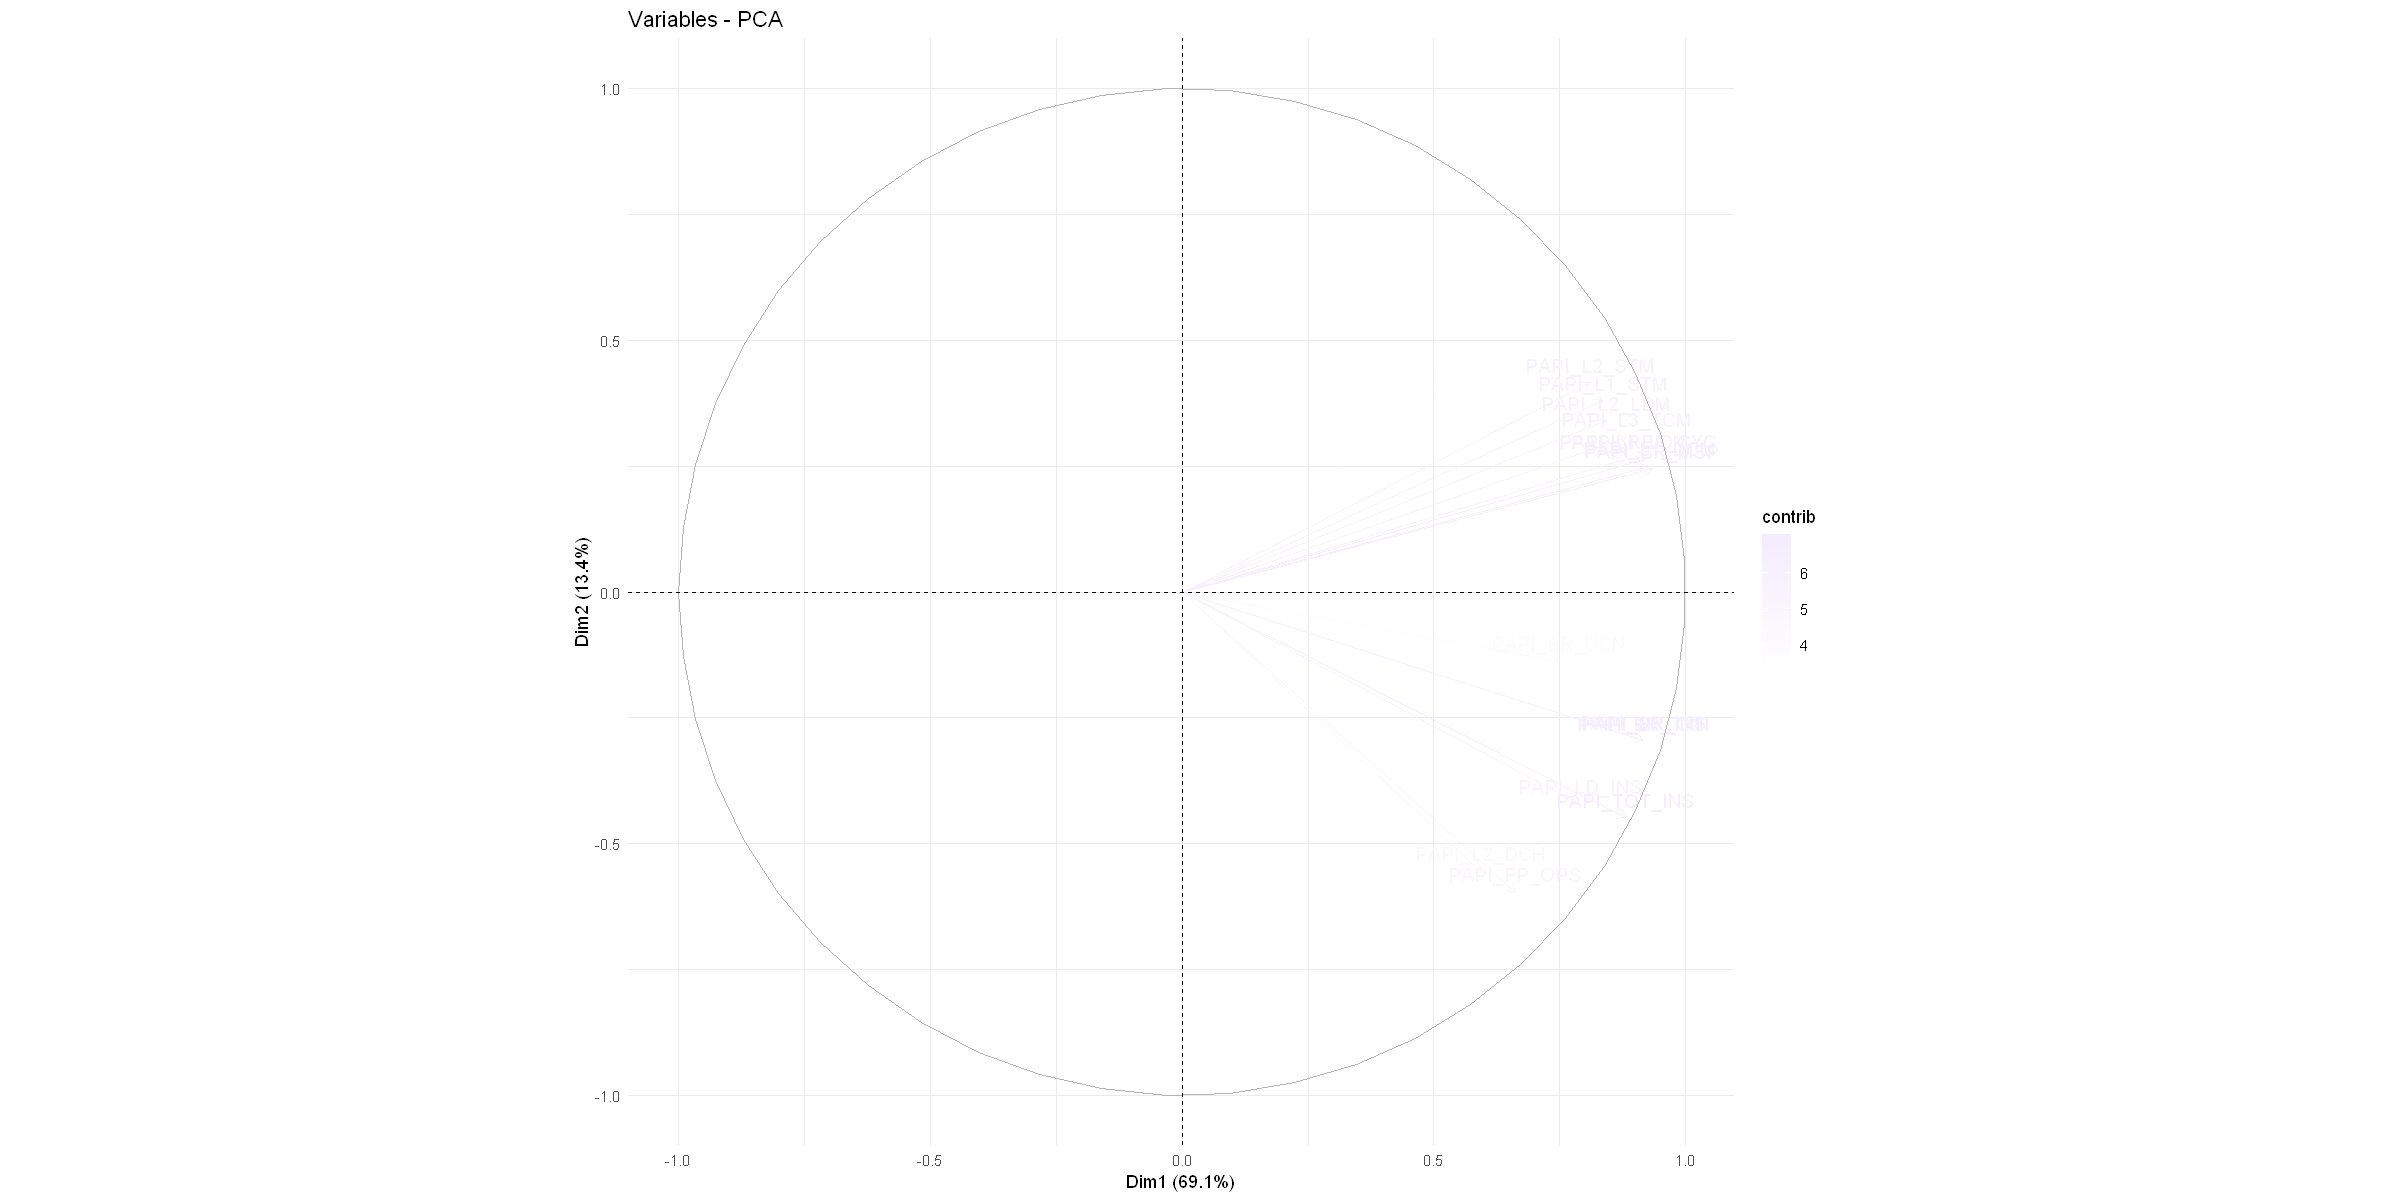

In [87]:
fviz_pca_var(res.pca, col.var="contrib") + scale_color_gradient2(low="white", mid="blue", high="red", midpoint=50) + theme_minimal()

In [88]:
new_mydata1 = mydata[,5:61]
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TOT_CYC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_DM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_FP_INS))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_INS))

new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_IM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_RES_STL))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_PRC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_MSP))




new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_DP))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_SP))

my_data_ordered1 <- new_mydata1[,order(colnames(new_mydata1))]


options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 100)
res1 <- cor(my_data_ordered1)
dim(res1)
round(res1, 2)

ERROR: Error in `[.data.frame`(mydata, , 5:61): undefined columns selected


In [ ]:
library(corrplot)


corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "AOE", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=2)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=3)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=4)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=6)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=7)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=8)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=9)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=10)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=11)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=12)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=13)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=14)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=15)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=16)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=17)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "FPC", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "alphabet", number.cex = 0.5)